In [1]:
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import nltk, os

# Explicitly set and add your path
nltk_data_dir = os.path.expanduser("~/nltk_data")
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)

# Download both tokenizers that newer versions of NLTK need
nltk.download('punkt', download_dir=nltk_data_dir)
nltk.download('punkt_tab', download_dir=nltk_data_dir)


[nltk_data] Downloading package punkt to /home/dilshat/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/dilshat/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from nltk.tokenize import word_tokenize

dream_text = "I was running in the forest and then I fell into the river. I was scared but I woke up safe."
tokens = [w.lower() for w in word_tokenize(dream_text) if w.isalpha()]
print(tokens)

['i', 'was', 'running', 'in', 'the', 'forest', 'and', 'then', 'i', 'fell', 'into', 'the', 'river', 'i', 'was', 'scared', 'but', 'i', 'woke', 'up', 'safe']


In [4]:
# edges
edges = list(zip(tokens[:-1], tokens[1:]))
print(edges)

[('i', 'was'), ('was', 'running'), ('running', 'in'), ('in', 'the'), ('the', 'forest'), ('forest', 'and'), ('and', 'then'), ('then', 'i'), ('i', 'fell'), ('fell', 'into'), ('into', 'the'), ('the', 'river'), ('river', 'i'), ('i', 'was'), ('was', 'scared'), ('scared', 'but'), ('but', 'i'), ('i', 'woke'), ('woke', 'up'), ('up', 'safe')]


In [5]:
G = nx.Graph()
G.add_edges_from(edges)

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

Nodes: 16, Edges: 19


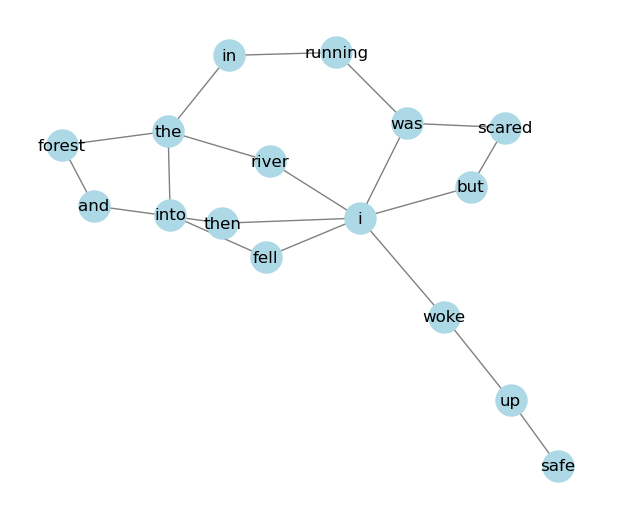

In [6]:
plt.figure(figsize=(6,5))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.show()

In [7]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
largest_cc = max(len(c) for c in nx.connected_components(G))
diameter = nx.diameter(G) if nx.is_connected(G) else None

print(num_nodes, num_edges, avg_degree, largest_cc, diameter)

16 19 2.375 16 6
